# Important Notes from Chapter 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

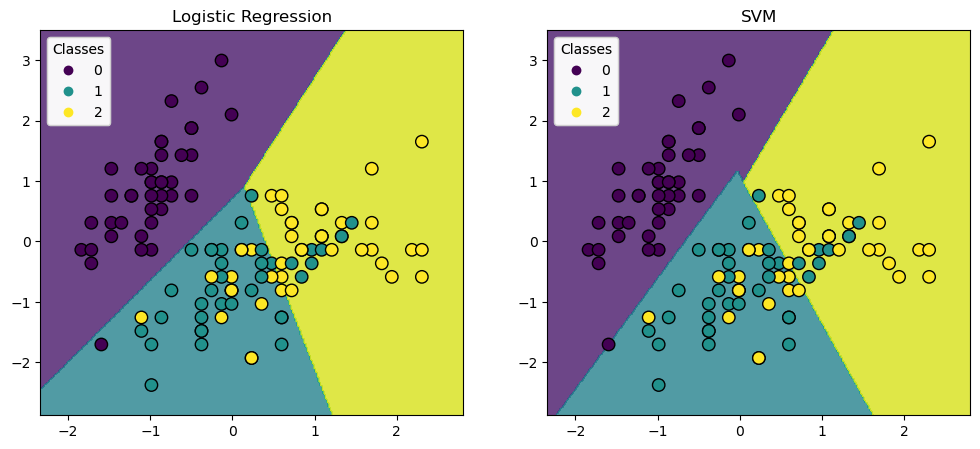

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression and SVM models
logreg = LogisticRegression(C=1, random_state=42)
logreg.fit(X_train, y_train)

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Plot the decision boundaries
def plot_decision_boundary(model, X, y, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
    ax.add_artist(legend1)
    ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title('Logistic Regression')
axes[1].set_title('SVM')
plot_decision_boundary(logreg, X_train, y_train, axes[0])
plot_decision_boundary(svm, X_train, y_train, axes[1])

plt.show()